<a href="https://colab.research.google.com/github/viv-bad/pytorch-course/blob/master/02_neural_network_classification_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. Neural Network Classification with PyTorch

Classification is a problem of predicting whether something is one thing or another (there can be multiple things as options).
https://www.learnpytorch.io/02_pytorch_classification/

# 1. Make classification data and get it read

In [ ]:
import sklearn
from sklearn.datasets import make_circles

# Make 1000 samples

n_samples = 1000

#Create circles
X, y = make_circles(n_samples, noise=0.03, random_state=42)


In [ ]:
len(X), len(y) # X = features, y = labels

(1000, 1000)

In [ ]:
print(f"First 5 samples of X: {X[:5]}") # 2 features of X which relates to one output of y


First 5 samples of X: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]


In [ ]:
print(f"First 5 samples of y: {y[:5]}") # binary class classification

First 5 samples of y: [1 1 1 1 0]


In [ ]:
# Make a DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0], "X2": X[:,1], "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


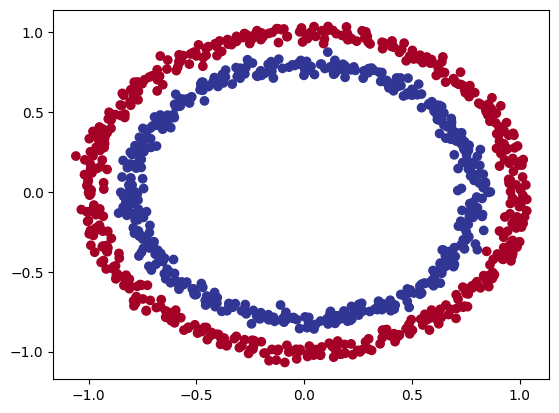

In [ ]:
# Visualise
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap=plt.cm.RdYlBu)

Note: The data we are working with is a toy dataset, a small dataset to experiment on, but sizeable enough to practice the fundamentals.

### 1.1 Check input and output shapes

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# View he first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}") # y is a scalar so doesn't have a shape



Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


### 1.2 Turn data into tensors and create train and test splits

In [ ]:
# Turn data into tensors
import torch
torch.__version__

'2.6.0+cu124'

In [ ]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [ ]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float) #X is a numpy array, convert to tensor of dtype float32
y = torch.from_numpy(y).type(torch.float) #y is a numpy array, convert to tensor of dtype float32

X[:5], y[:5]


(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 20% test data, 80% train data


In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Building a model

Let's build a model to classify our blue and red dots.

To do so, we want to :

1. Set up device agnostic code
2. Construct a model (by subclassing `nn.Module`)
3. Define a loss function and optimizer
4. Create a training and test loop

In [ ]:
# Import PyTorch and nn
import torch
from torch import nn

# Make Device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
X_train.shape

torch.Size([800, 2])

Now we've set up device agnostic code, let's create a model that:
1. Subclasses `nn.Module` (almost all models subclass this)
2. Create 2 `nn.Linear()` layers, that are capable of handling the shapes of our data
3. Defines a `forward()` method that outlines the forward pass/computation of the model
4. Instantiate an instance of our model class and send it to the target `device`

In [ ]:
# Construct the model that subclasses nn.Module

class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    #2. Create 2 nn.Linear() layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2, out_features=5) #X and y, takes in 2 features and upscales to 5 features
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features from previous layer and outputs single feature (same shape as y)
    # 3. define a forward method that outlines the forward pass
  def forward(self, x):
    return  self.layer_2(self.layer_1(x)) # x -> layer_1 -> output of layer_1 -> layer_2 -> output

# 4. Instantiate an instance of our model class and send it to the target device
model_0 = CircleModelV1().to(device)

model_0


CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [ ]:
# Let's replicate the model above using nn.Sequential(), which just implements everything in CircleModelV1 behind the scenes

model_0 = nn.Sequential(
    nn.Linear(in_features = 2, out_features = 5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

You have significant flexibility with setting the input and output features in your neural network, though there are some constraints to consider:

**For Input Features:**
- The number of input features (`in_features`) in your first layer must match the dimensionality of your input data
- If your data has 2 features (like x and y coordinates), then `in_features=2` is required
- If you're working with images, text, or higher-dimensional data, you'd increase this accordingly (e.g., 784 for flattened MNIST images, 3 for RGB values)

**For Output Features:**
- The number of output features in your final layer depends on your task:
  - For binary classification: 1 output (with sigmoid activation)
  - For multi-class classification: number of classes (with softmax activation)
  - For regression: typically 1 output, but could be more for multi-target regression

**For Hidden Layers:**
- You have complete freedom for the number of hidden layers and their sizes
- The example shows 5 neurons in the hidden layer, but you could choose any number
- You could add more layers: `layer_1 → layer_2 → layer_3 → ... → final_layer`
- Different layer sizes create "bottlenecks" or "expansions" in your network

**Example Variations:**
```python
# For image classification with 784 inputs (28x28 MNIST) and 10 classes
model = nn.Sequential(
    nn.Linear(in_features=784, out_features=128),
    nn.ReLU(),
    nn.Linear(in_features=128, out_features=64),
    nn.ReLU(),
    nn.Linear(in_features=64, out_features=10)
)

# For a regression problem with 4 input features and 1 output
model = nn.Sequential(
    nn.Linear(in_features=4, out_features=16),
    nn.ReLU(),
    nn.Linear(in_features=16, out_features=1)
)
```

The key constraint is that the `in_features` of each layer must match the `out_features` of the previous layer to maintain a valid network flow.

In [ ]:
# Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions: \n{untrained_preds[:10]}")
print(f"\nFirst 10 labels: \n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions: 
tensor([[-0.4960],
        [-0.4745],
        [-0.5116],
        [-0.4917],
        [-0.4471],
        [-0.4345],
        [-0.4252],
        [-0.4156],
        [-0.5143],
        [-0.4723]], device='cuda:0')

First 10 labels: 
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [ ]:
y_test

tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
        1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
        1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
        0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
        1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
        0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
        1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
        0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
        1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
        0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
        1., 1.])

### 2.1 Setup loss function and optimizer

Which loss function or optimizer should we use?

This is problem-specific

For example for regression you may want MAE or MSE.
For classification, binary cross entropy or categorical cross entropy


#### Binary Cross Entropy:
# Binary Cross Entropy Explained Simply

Binary cross entropy is a loss function used to measure how well a binary classification model is performing. It quantifies the difference between predicted probabilities and actual values.

Think of it this way: when your model makes a prediction, it doesn't just say "yes" or "no" - it gives a probability between 0 and 1. Binary cross entropy measures how "surprised" your model would be by the true answer.

Here's the formula:
```
BCE = -[y * log(p) + (1-y) * log(1-p)]
```

Where:
- `y` is the true label (0 or 1)
- `p` is the predicted probability of the positive class

This formula has two main parts:
1. When the true label is 1: `-y * log(p)` becomes `-log(p)`
2. When the true label is 0: `-(1-y) * log(1-p)` becomes `-log(1-p)`

## What makes it effective:

- It heavily penalizes confident incorrect predictions
- It gives small penalties for correct predictions, even when not 100% confident
- It's differentiable, making it ideal for gradient-based optimization

For example, if the true label is 1 and your model predicts 0.9, the loss is small. But if it predicts 0.1, the loss is large. This incentivizes the model to be both accurate and appropriately confident.

Binary cross entropy is commonly used in neural networks with sigmoid activation in the final layer, logistic regression, and many other binary classification tasks.

In [ ]:
# Setup the loss function
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid function built in

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [ ]:
# Calculate accuracy # truePositive/truePositive+trueNegative * 100, remember compare predictions to ground truth labels
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc


### 3. Train model

To train our model, we're going to need to build the training loop.

1. Forward pass
2. Calculate the loss
3. Optimize zero grad
4. Loss backward (backpropogation)
5. Optimizer (gradient descent)


### 3.1 Going from raw logits -> prediction probabilities -> prediction labels

Our model outputs are going to be raw **logits**.

We can convert these **logits** into **prediction probabilities** by passing them to some kind of activation function (e.g. sigmoid for binary classification and softmax for multiclass classification).

Then we can convert our model's prediction probabilities to **prediction labels** by either rounding them or taking the `argmax()`


In [ ]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.4960],
        [-0.4745],
        [-0.5116],
        [-0.4917],
        [-0.4471]], device='cuda:0')

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [ ]:
# Use the sigmoid activtation function on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.3785],
        [0.3836],
        [0.3748],
        [0.3795],
        [0.3900]], device='cuda:0')

For our prediction probability values we need to perform a range-style rounding on them:
* `y_pred_probs` >= 0.5, `y=1` (class 1)
* `y_pred_probs` < 0.5, `y=0` (class 0)

In [ ]:
# Find the predicted labels (from output of model = logits -> prediction probabilities)

y_preds = torch.round(y_pred_probs)

y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 0., 0., 0.], device='cuda:0')

In [ ]:
### 3.2 Building a training and testing loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set he number of epochs
epochs = 1000

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
  ### Training
  model_0.train()

  # 1. Forward pass
  y_logits = model_0(X_train).squeeze() # remember squeeze removes one dimension from a tensor
  y_pred = torch.round(torch.sigmoid(y_logits)) # converts logits into prediction probabilities and then into prediction labels

  # 2. Calculate loss/accuracy
  loss = loss_fn(y_logits, y_train) #BCE with logits loss expects logits as input, nn.BCEWithLogitsLoss

  acc = accuracy_fn(y_true = y_train, y_pred=y_pred)

  # 3. Optimizer  zero grad
  optimizer.zero_grad()

  # 4. Loss backward - backpropogration
  loss.backward()

  # 5. Optimizer step - gradient descent
  optimizer.step()

  ### Testing
  model_0.eval()

  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_0(X_test).squeeze() # get rid of one dimension
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate test loss/acc
    test_loss= loss_fn(test_logits, y_test)

    test_acc = accuracy_fn(y_true = y_test, y_pred = test_pred)

  # Print out
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")




Epoch: 0 | Loss: 0.72084, Acc: 50.00% | Test loss: 0.71879, Test acc: 50.00%
Epoch: 10 | Loss: 0.70318, Acc: 50.00% | Test loss: 0.70331, Test acc: 50.00%
Epoch: 20 | Loss: 0.69684, Acc: 50.00% | Test loss: 0.69790, Test acc: 50.00%
Epoch: 30 | Loss: 0.69447, Acc: 50.00% | Test loss: 0.69596, Test acc: 50.00%
Epoch: 40 | Loss: 0.69357, Acc: 49.75% | Test loss: 0.69527, Test acc: 47.00%
Epoch: 50 | Loss: 0.69322, Acc: 46.12% | Test loss: 0.69502, Test acc: 47.00%
Epoch: 60 | Loss: 0.69308, Acc: 49.50% | Test loss: 0.69494, Test acc: 47.50%
Epoch: 70 | Loss: 0.69303, Acc: 49.62% | Test loss: 0.69490, Test acc: 47.00%
Epoch: 80 | Loss: 0.69300, Acc: 50.25% | Test loss: 0.69488, Test acc: 46.50%
Epoch: 90 | Loss: 0.69299, Acc: 50.62% | Test loss: 0.69486, Test acc: 46.50%
Epoch: 100 | Loss: 0.69299, Acc: 50.50% | Test loss: 0.69485, Test acc: 46.00%
Epoch: 110 | Loss: 0.69299, Acc: 51.00% | Test loss: 0.69483, Test acc: 45.50%
Epoch: 120 | Loss: 0.69299, Acc: 50.88% | Test loss: 0.69482, T

## 4. Make predictions and evaluate the model

From the metrics it looks like our model isn't learning anything

So to inspect it, let's make some predictions and visualise them

import a function called `plot_decision_boundary()`



In [ ]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [ ]:
from helper_functions import plot_predictions, plot_decision_boundary

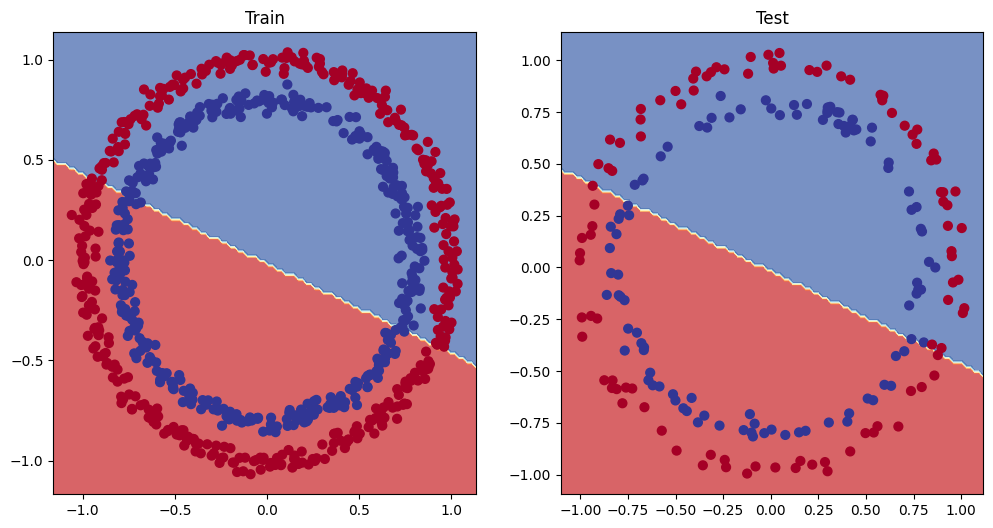

In [ ]:
# Plot decision boundary of model

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

# 5. Improving a model (from a model perspective)

* Add more layers - give the model more chances to learn about patterns in the data
* Add more hidden units - go from 5 to 10 hidden unit
* Fit for longer - more epochs
* Changing the activation functions
* Change the learning rate - amount optimizer adjusts per epoch
* Change the loss function

These options are all from a model's perspective as they deal directly with the model rather than the data.

We can change these values, so they are hyperparameters.

Let's:
* Add more hidden units 5 -> 10
* Increase layers 2 -> 3
* Increase epochs


In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features=10)
    self.relu_1 = nn.ReLU()
    self.layer_2 = nn.Linear(in_features = 10, out_features=10)
    self.relu_2 = nn.ReLU()
    self.layer_3 = nn.Linear(in_features = 10, out_features=1)


  def forward(self, x):
    # z = self.layer_1(x)
    # z = self.layer_2(z)
    # z = self.layer_3(z)
    # return z
    # return self.layer_3(self.layer_2(self.layer_1(x)))
    x = self.relu_1(self.layer_1(x))
    x = self.relu_2(self.layer_2(x))
    return self.layer_3(x)


model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (relu_1): ReLU()
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (relu_2): ReLU()
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Create loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create optimizer

optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)



In [ ]:
# Write training and evaluation loop for model_1
model_1.eval()
with torch.inference_mode():
  y_logits = model_1(X_test.to(device))[:5]
y_logits

tensor([[0.0167],
        [0.0207],
        [0.0126],
        [0.0171],
        [0.0420]], device='cuda:0')

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.], device='cuda:0')

In [ ]:
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5042],
        [0.5052],
        [0.5032],
        [0.5043],
        [0.5105]], device='cuda:0')

In [ ]:
y_preds = torch.round(y_pred_probs)
y_pred_labels = torch.round(torch.sigmoid(model_1(X_test.to(device))[:5]))
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([1., 1., 1., 1., 1.], device='cuda:0')

In [ ]:
model_0.state_dict()
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.122

In [ ]:
### 3.2 Building a training and testing loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set he number of epochs
epochs = 1000

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
  ### Training
  model_1.train()

  # 1. Forward pass
  y_logits = model_1(X_train).squeeze() # remember squeeze removes one dimension from a tensor
  y_pred = torch.round(torch.sigmoid(y_logits)) # converts logits into prediction probabilities and then into prediction labels

  # 2. Calculate loss/accuracy
  loss = loss_fn(y_logits, y_train) #BCE with logits loss expects logits as input, nn.BCEWithLogitsLoss

  acc = accuracy_fn(y_true = y_train, y_pred=y_pred)

  # 3. Optimizer  zero grad
  optimizer.zero_grad()

  # 4. Loss backward - backpropogration
  loss.backward()

  # 5. Optimizer step - gradient descent
  optimizer.step()

  ### Testing
  model_1.eval()

  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_1(X_test).squeeze() # get rid of one dimension
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate test loss/acc
    test_loss= loss_fn(test_logits, y_test)

    test_acc = accuracy_fn(y_true = y_test, y_pred = test_pred)

  # Print out
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")




Epoch: 0 | Loss: 0.69295, Acc: 50.00% | Test loss: 0.69319, Test acc: 50.00%
Epoch: 100 | Loss: 0.69115, Acc: 52.88% | Test loss: 0.69102, Test acc: 52.50%
Epoch: 200 | Loss: 0.68977, Acc: 53.37% | Test loss: 0.68940, Test acc: 55.00%
Epoch: 300 | Loss: 0.68795, Acc: 53.00% | Test loss: 0.68723, Test acc: 56.00%
Epoch: 400 | Loss: 0.68517, Acc: 52.75% | Test loss: 0.68411, Test acc: 56.50%
Epoch: 500 | Loss: 0.68102, Acc: 52.75% | Test loss: 0.67941, Test acc: 56.50%
Epoch: 600 | Loss: 0.67515, Acc: 54.50% | Test loss: 0.67285, Test acc: 56.00%
Epoch: 700 | Loss: 0.66659, Acc: 58.38% | Test loss: 0.66322, Test acc: 59.00%
Epoch: 800 | Loss: 0.65160, Acc: 64.00% | Test loss: 0.64757, Test acc: 67.50%
Epoch: 900 | Loss: 0.62362, Acc: 74.00% | Test loss: 0.62145, Test acc: 79.00%


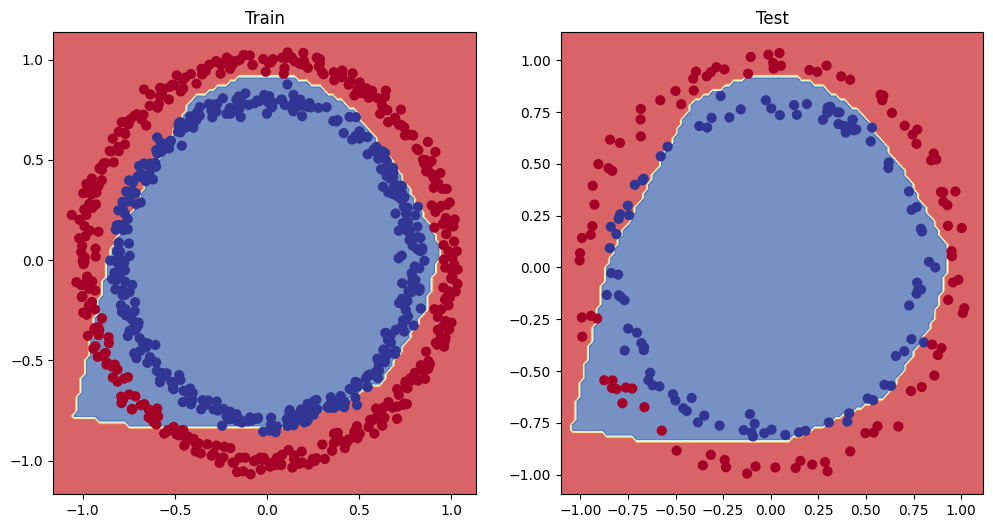

In [ ]:
# Plot decision boundary

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

## 6. The missing piece - non-linearity

"What patterns could you draw if you were given an infinite amount of a straight and non-straight lines?"

Or in machine learning terms, an infinite amount of linear and non-linear functions?

### 6.1 Recreating non-linear data (red and blue circles)



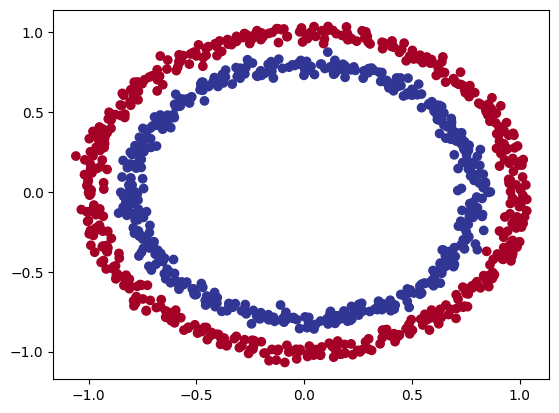

In [ ]:
# Make and plot data
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples, noise=0.03, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
# Convert data to tensors and then to train and test splits
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train[:5], y_train[:5]


(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### 6.2 Building a model with non-linearity

- Linear = straight lines
- Non linear = non straight lines

In [ ]:
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU() # Non linear activation function

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x))))) # put the relu activation function in between each layer


model_3 = CircleModelV2().to(device)

model_3



CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
# Set up loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

In [ ]:
# spam or not spam
# credit cards = fraud or not fraud
# insurance claims fault or not fault
# classification examples

In [ ]:
### 6.3 Training a model with non-linearity

torch.manual_seed(42)
torch.cuda.manual_seed(42)

# put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

#loop through data

epochs = 1000

for epoch in range(epochs):
  model_3.train()

  #1. Forward pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  #2. calculate loss

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  #3. optimize zero grad
  optimizer.zero_grad()

  # 4. backprop
  loss.backward()

  #step optimiser/grad descent
  optimizer.step()

  ### Testing
  model_3.eval()

  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss= loss_fn(test_logits, y_test)

    test_acc = accuracy_fn(y_true = y_test, y_pred=test_pred)

  # Print out
  if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test loss: {test_loss:.4f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.6929, Acc: 50.00% | Test loss: 0.6932, Test acc: 50.00%
Epoch: 10 | Loss: 0.6925, Acc: 50.50% | Test loss: 0.6926, Test acc: 50.00%
Epoch: 20 | Loss: 0.6922, Acc: 59.13% | Test loss: 0.6923, Test acc: 56.50%
Epoch: 30 | Loss: 0.6921, Acc: 70.25% | Test loss: 0.6921, Test acc: 68.00%
Epoch: 40 | Loss: 0.6919, Acc: 68.38% | Test loss: 0.6919, Test acc: 71.00%
Epoch: 50 | Loss: 0.6918, Acc: 58.25% | Test loss: 0.6918, Test acc: 58.00%
Epoch: 60 | Loss: 0.6917, Acc: 54.00% | Test loss: 0.6916, Test acc: 54.50%
Epoch: 70 | Loss: 0.6915, Acc: 53.12% | Test loss: 0.6915, Test acc: 53.00%
Epoch: 80 | Loss: 0.6914, Acc: 52.62% | Test loss: 0.6913, Test acc: 53.00%
Epoch: 90 | Loss: 0.6913, Acc: 52.75% | Test loss: 0.6912, Test acc: 53.00%
Epoch: 100 | Loss: 0.6912, Acc: 52.88% | Test loss: 0.6910, Test acc: 52.50%
Epoch: 110 | Loss: 0.6910, Acc: 52.88% | Test loss: 0.6909, Test acc: 53.50%
Epoch: 120 | Loss: 0.6909, Acc: 53.12% | Test loss: 0.6907, Test acc: 54.00%
Epoch: 130

In [ ]:
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test)).squeeze())
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

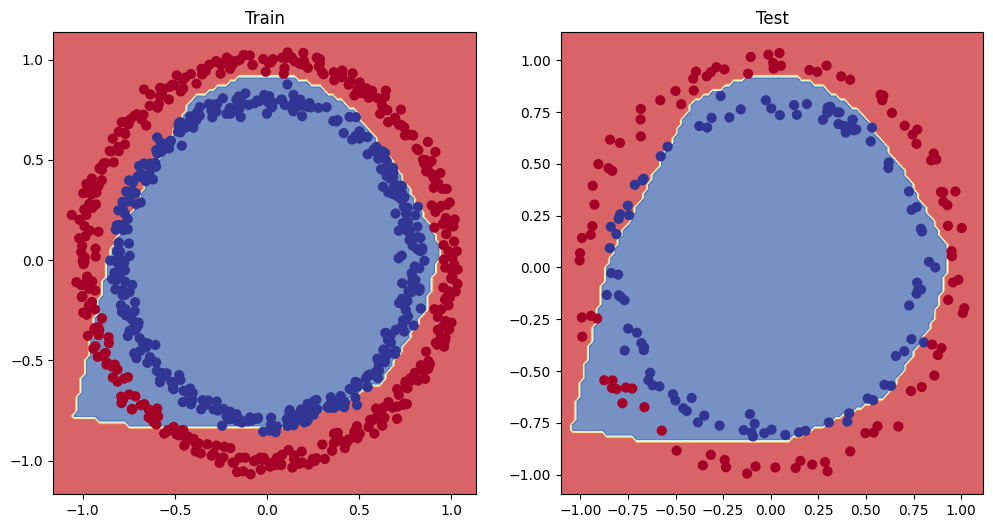

In [ ]:
# Plot decision boundary

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

### 7. Replicating non-linear activation functions

Neural networks - rather than us telling the model what to learn, we give it the tools to discover patterns in data and it tries to figure out the best patterns on it's own.

These tools are linear and non-linear functions

In [ ]:
# Create a tensor
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A.dtype

torch.float32

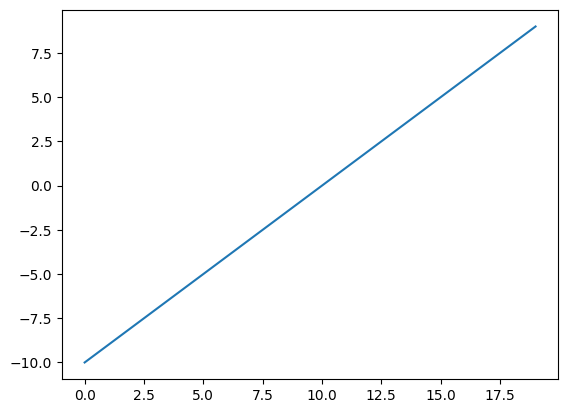

In [ ]:
# Visualize this data
plt.plot(A)

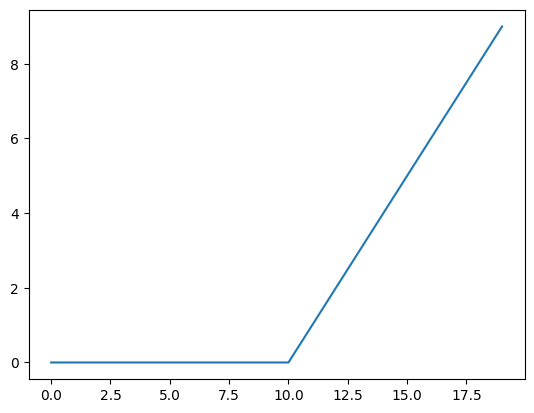

In [ ]:
plt.plot(torch.relu(A))

In [ ]:
def relu(x: torch.Tensor) -> torch.tensor:
  return torch.max(torch.tensor(0), x) # inputs must be tensors

A, relu(A)

(tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
           2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.]),
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
         8., 9.]))

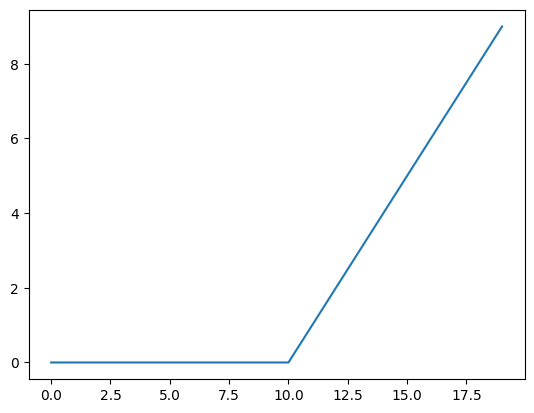

In [ ]:
# Plot ReLU activation function
plt.plot(relu(A))

In [ ]:
# Sigmoid
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))

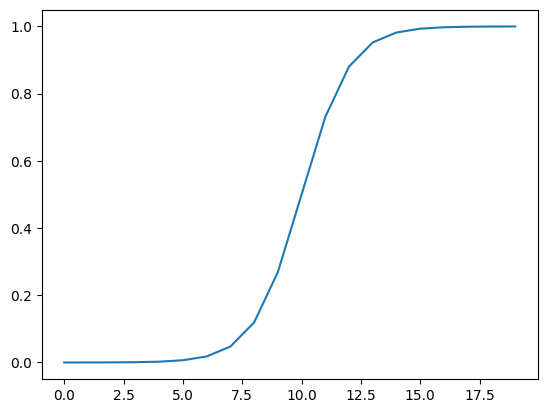

In [ ]:
plt.plot(torch.sigmoid(A))

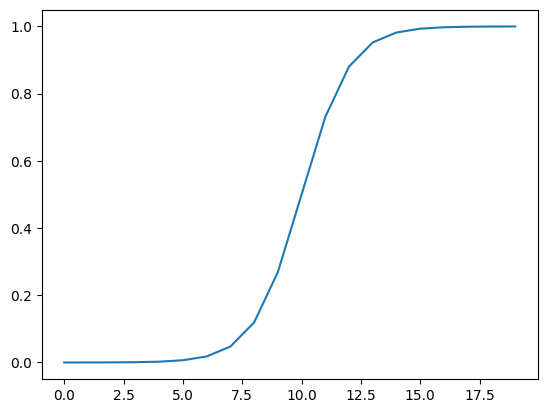

In [ ]:
plt.plot(sigmoid(A))

## 8. Putting it all together with a multi-class classification model

* Binary classification - one thing vs another (cat vs dog, span vs not spam, fraud or not fraud)
* Multiclass classification - many things


### 8.1 Creating a toy multi-class dataset

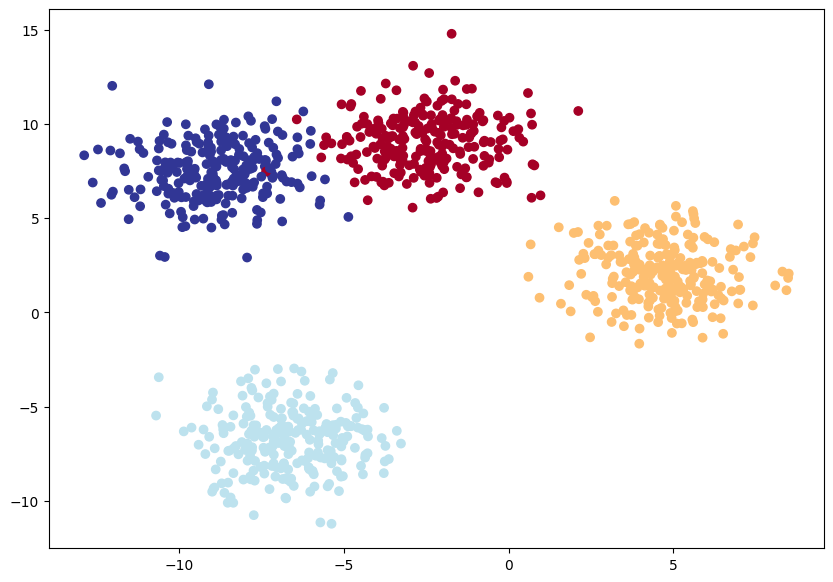

In [ ]:
# import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multiclass data
X_blob, y_blob = make_blobs(n_samples = 1000, n_features=NUM_FEATURES, centers=NUM_CLASSES, cluster_std=1.5, random_state=RANDOM_SEED)

# 2. turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size=0.2, random_state=RANDOM_SEED)

# 4. plot data
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)



### 8.2 Building a multi-class clasification model in PyTorch

In [ ]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

device

'cuda'

In [ ]:
# Build a multiclass classification model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    """
    Initialises multi-class classification model.

    Args:
      input_features (int) : Number of input features to the model
      output_features (int) : Number of output features to the model (number of output classes)
      hidden_units (int): Number of hidden units between layers, default 8

    Returns:

    Raises:

    Example:
    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units), # final output to be output features, hidden units in the middle hidden layers
        # nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        # nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)


model_4 = BlobModel(input_features=2, output_features=4, hidden_units=8).to(device)

model_4


BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

### 8.3 Create loss function and optimizer


In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_4.parameters(), lr=0.1)

### 8.4 Getting prediction probabilities for a multi-class PyTorch model

- In order to evaluate and train and test out model, we need to convert out model's outputs (logits) to prediction probabilities and then to prediction labels.

logits -> pred_probs -> pred_labels

use non linear function (softmax) to convert llogits to pred probs

In [ ]:
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))

y_logits[:10]

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852],
        [ 2.0878, -1.3728,  2.1248,  2.5052],
        [ 1.8310,  0.8851,  2.1674,  0.6006],
        [ 0.1412, -1.4742, -0.0360,  1.0373],
        [ 2.9426,  0.7047,  3.3670,  1.6184],
        [-0.0645, -1.5006, -0.2666,  0.8940]], device='cuda:0')

In [ ]:
y_pred_probs = torch.softmax(y_logits, dim=1)

In [ ]:
# Convert our model's prediction probabilities to prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([3, 3, 2, 1, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2,
        2, 2, 3, 3, 3, 3, 3, 1, 1, 2, 1, 2, 1, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3,
        3, 3, 1, 3, 3, 1, 3, 2, 3, 1, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 3, 3, 2, 3, 3, 3, 3, 2, 3, 1, 3, 3, 2, 1, 1, 3, 2, 2, 3, 3, 3, 1, 2,
        2, 3, 3, 1, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 1, 1, 3, 2, 2,
        2, 2, 3, 3, 3, 2, 2, 1, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3,
        2, 2, 2, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3,
        1, 3, 2, 3, 3, 1, 2, 3], device='cuda:0')

In [ ]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

### 8.5 Create a training and test loop fro a multi-class PyTorch model: 13:24:07

In [ ]:
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed(RANDOM_SEED)

epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_4.train()

  y_logits = model_4(X_train)
  y_preds = torch.softmax(y_logits, dim=1).argmax(dim=1)

  # loss = loss_fn(y_logits, y_train)
  loss = loss_fn(y_logits, y_train.long())
  acc = accuracy_fn(y_true = y_train, y_pred = y_preds)

  optimizer.zero_grad()
  loss.backward()

  optimizer.step()

  model_4.eval()

  with torch.inference_mode():
    test_logits = model_4(X_test)
    test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

    # test_loss= loss_fn(test_logits, y_test)
    test_loss = loss_fn(test_logits, y_test.long())

    test_acc = accuracy_fn(y_true = y_test, y_pred = test_pred)
  # Print out
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")



Epoch: 0 | Loss: 1.50091, Acc: 4.75% | Test loss: 1.43600, Test acc: 86.50%
Epoch: 10 | Loss: 1.04918, Acc: 48.75% | Test loss: 1.01981, Test acc: 86.50%
Epoch: 20 | Loss: 0.85343, Acc: 50.75% | Test loss: 0.84133, Test acc: 86.50%
Epoch: 30 | Loss: 0.77432, Acc: 51.00% | Test loss: 0.76949, Test acc: 86.50%
Epoch: 40 | Loss: 0.74068, Acc: 50.12% | Test loss: 0.73862, Test acc: 86.50%
Epoch: 50 | Loss: 0.72436, Acc: 50.38% | Test loss: 0.72347, Test acc: 86.50%
Epoch: 60 | Loss: 0.71538, Acc: 50.25% | Test loss: 0.71505, Test acc: 86.50%
Epoch: 70 | Loss: 0.70992, Acc: 50.62% | Test loss: 0.70990, Test acc: 86.50%
Epoch: 80 | Loss: 0.70635, Acc: 50.25% | Test loss: 0.70651, Test acc: 86.50%
Epoch: 90 | Loss: 0.70388, Acc: 50.50% | Test loss: 0.70417, Test acc: 86.50%
Epoch: 100 | Loss: 0.70209, Acc: 50.62% | Test loss: 0.70247, Test acc: 86.50%
Epoch: 110 | Loss: 0.70074, Acc: 50.88% | Test loss: 0.70120, Test acc: 86.50%
Epoch: 120 | Loss: 0.69970, Acc: 51.25% | Test loss: 0.70023, Te

## 9. A few more classification metrics... to eval classification model

* Accuracy - out of 100 samples how many does our model get right
* Precision
* Recall
* F1 score
* Confusion matrix
* Classification report


Use `torchmetrics`


In [ ]:
# !pip install torchmetrics
from torchmetrics import Accuracy

torchmetric_accuracy = Accuracy().to(device)

torchmetric_accuracy(y_preds, y_test)

ValueError: Optional arg `num_classes` must be type `int` when task is ClassificationTask.MULTICLASS. Got <class 'NoneType'>